<h1> SCHRITT 1: Bibliotheken importieren & Daten laden

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# CSV-Datei einlesen (UTF-8-SIG sichert Umlaut-Kompatibilität)
df = pd.read_csv('C:/Users/anasl/Desktop/Daten 1/Daten/Output Data/Weather_Master_Data.csv', encoding='utf-8-sig', low_memory=False)


<h1> SCHRITT 2: Verfügbare Wetterstationen anzeigen

In [17]:
stationen = df['Standort'].unique()
# stationen enthält alle verfügbaren Orte

<h1> SCHRITT 3: Wetterstation auswählen & Daten vorbereiten

In [18]:
# Replace with actual station name

# Gewünschte Station hier eingeben
ausgewaehlte_station = 'Friesoythe-Altenoythe'

# Daten für die gewählte Station filtern
station_data = df[df['Standort'] == ausgewaehlte_station].copy()

# Datum in datetime-Format umwandeln
station_data['Datum'] = pd.to_datetime(station_data['Datum'], errors='coerce')

# Neue Spalte mit Jahr-Monat kombinieren
station_data['YearMonth'] = station_data['Datum'].dt.to_period('M')

# Monatliche Durchschnittswerte berechnen
monthly_data = station_data.groupby('YearMonth').agg({
    'MinTemp': 'mean',
    'AvgTemp': 'mean',
    'MaxTemp': 'mean'
}).reset_index()

# Timestamp-Spalte für Diagramme
monthly_data['Date'] = monthly_data['YearMonth'].dt.to_timestamp()

<h1> SCHRITT 4: Liniendiagramm – Monatliche Temperaturtrends

<Figure size 1200x600 with 0 Axes>

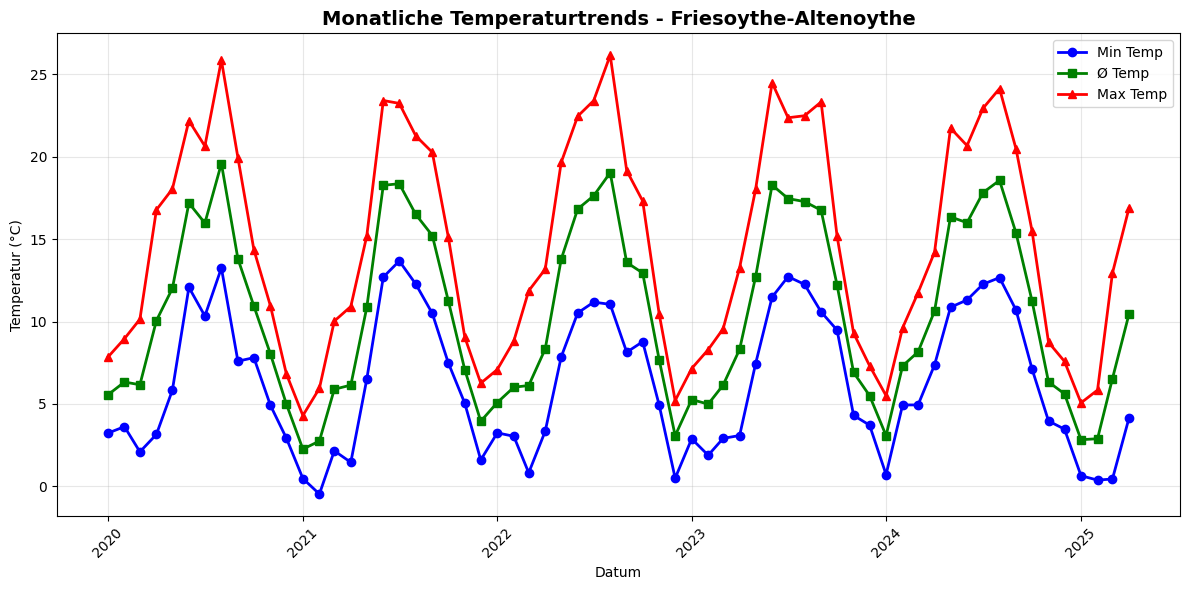

In [19]:
plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))

plt.plot(monthly_data['Date'], monthly_data['MinTemp'], 'b-o', label='Min Temp', linewidth=2)
plt.plot(monthly_data['Date'], monthly_data['AvgTemp'], 'g-s', label='Ø Temp', linewidth=2)
plt.plot(monthly_data['Date'], monthly_data['MaxTemp'], 'r-^', label='Max Temp', linewidth=2)

plt.title(f'Monatliche Temperaturtrends - {ausgewaehlte_station}', fontsize=14, fontweight='bold')
plt.xlabel('Datum')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 <h1> SCHRITT 5.1: Tägliche Hitzekategorien berechnen


In [20]:
# Jahr und Monat extrahieren
station_data['Year'] = station_data['Datum'].dt.year
station_data['Month'] = station_data['Datum'].dt.month

# Kriterien für heiße Tage definieren
station_data['Hitzetage'] = station_data['MaxTemp'] >= 30
station_data['Tropennächte'] = station_data['MinTemp'] >= 25
station_data['Wärmestau'] = station_data['AvgTemp'].rolling(window=3).mean() >= 25

# Unkomfortable Tage = mind. eine der Bedingungen erfüllt
station_data['Unkomfortable'] = (
    station_data['Hitzetage'] |
    station_data['Tropennächte'] |
    station_data['Wärmestau']
)

# <h1> SCHRITT 5.2: Balkendiagramme – Anzahl extremer Tage pro Monat


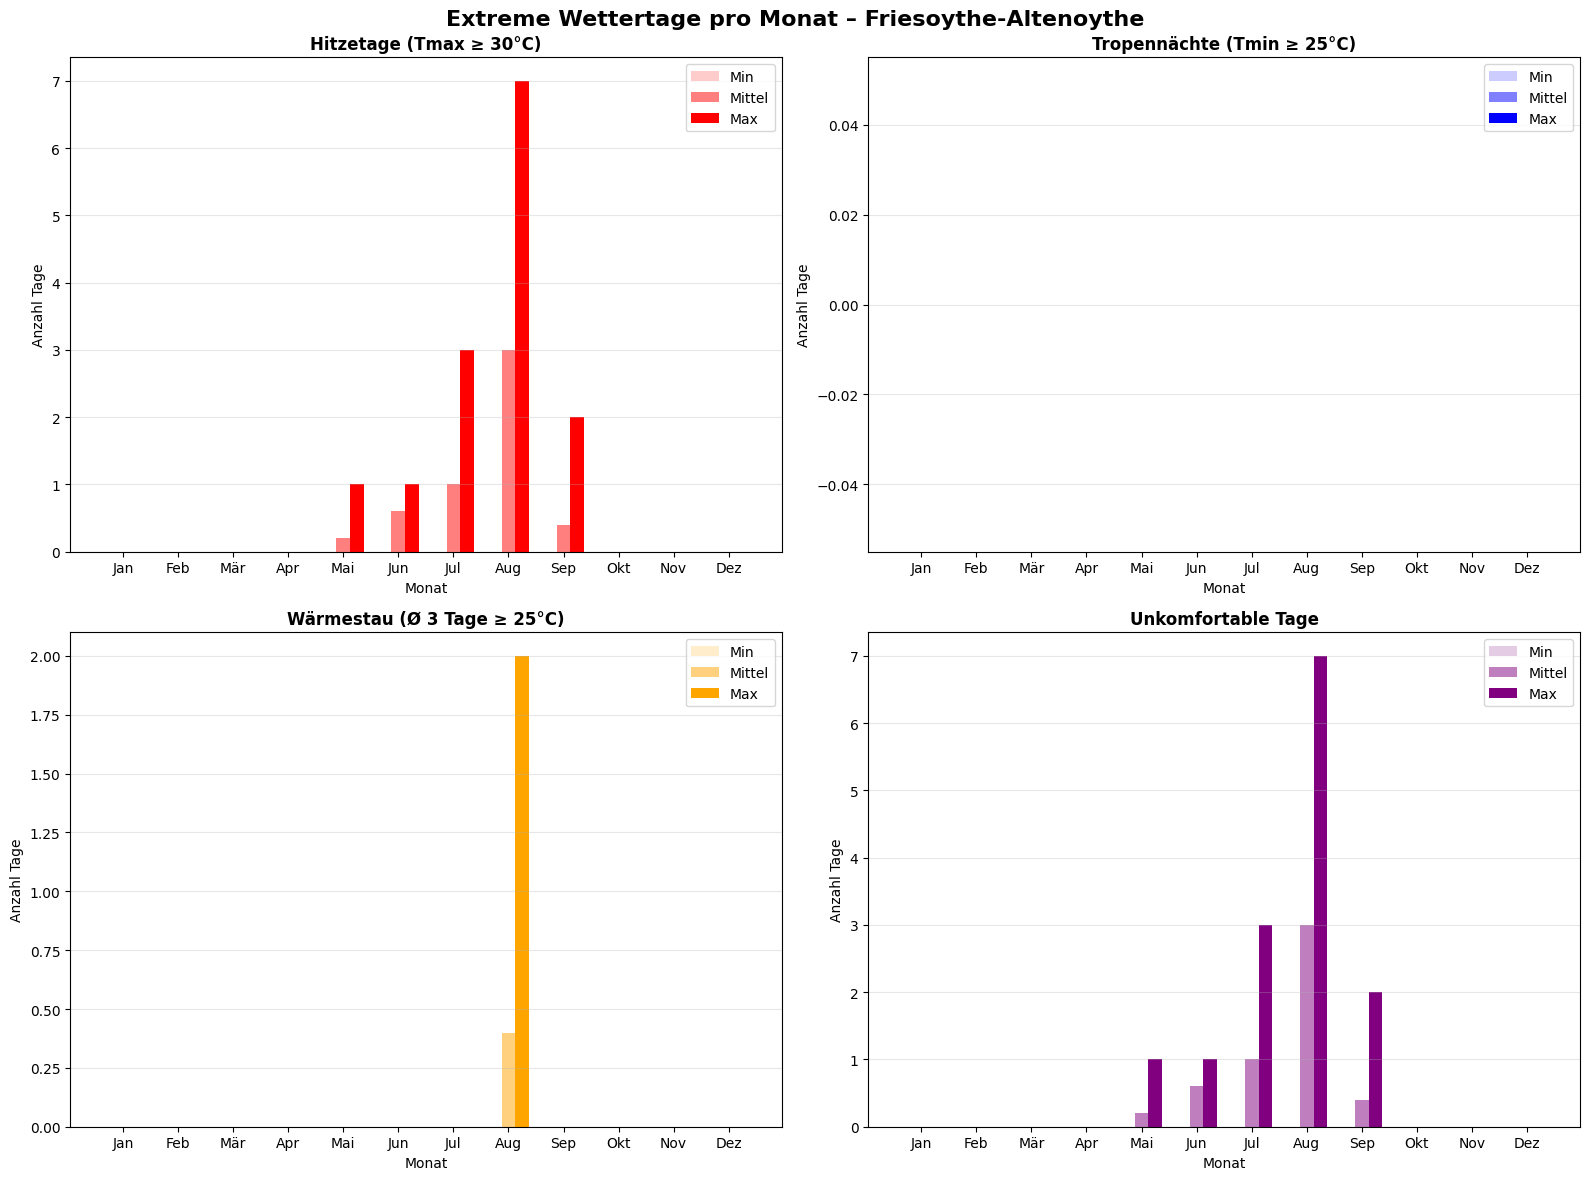

In [21]:
# Monatlich aggregieren
monthly_counts = station_data.groupby(['Year', 'Month']).agg({
    'Hitzetage': 'sum',
    'Tropennächte': 'sum',
    'Wärmestau': 'sum',
    'Unkomfortable': 'sum'
}).reset_index()

# Minimum, Mittelwert und Maximum berechnen
summary = monthly_counts.groupby('Month').agg(['min', 'mean', 'max'])

# Vorbereitung für Plot
months = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
          'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
x = np.arange(12)
width = 0.25

# Kategorien & Einstellungen
categories = ['Hitzetage', 'Tropennächte', 'Wärmestau', 'Unkomfortable']
colors = ['red', 'blue', 'orange', 'purple']
titles = [
    'Hitzetage (Tmax ≥ 30°C)',
    'Tropennächte (Tmin ≥ 25°C)',
    'Wärmestau (Ø 3 Tage ≥ 25°C)',
    'Unkomfortable Tage'
]

# Plot erstellen
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (cat, color, title) in enumerate(zip(categories, colors, titles)):
    ax = axes[idx]
    mins = summary[cat]['min'].values
    means = summary[cat]['mean'].values
    maxs = summary[cat]['max'].values

    ax.bar(x - width, mins, width, label='Min', color=color, alpha=0.2)
    ax.bar(x, means, width, label='Mittel', color=color, alpha=0.5)
    ax.bar(x + width, maxs, width, label='Max', color=color, alpha=1.0)

    ax.set_xticks(x)
    ax.set_xticklabels(months)
    ax.set_xlabel('Monat')
    ax.set_ylabel('Anzahl Tage')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

fig.suptitle(f'Extreme Wettertage pro Monat – {ausgewaehlte_station}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<h1> SCHRITT 6: Liniendiagramm – Entwicklung pro Jahr

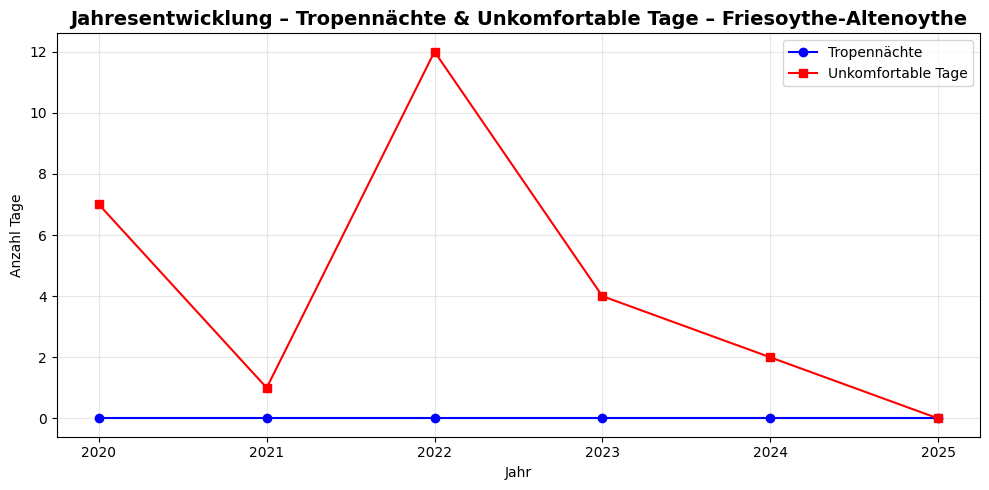

In [22]:
# Jährliche Gesamtsummen berechnen
yearly_totals = station_data.groupby('Year').agg({
    'Tropennächte': 'sum',
    'Unkomfortable': 'sum'
}).reset_index()

# Plot erstellen
plt.figure(figsize=(10, 5))
plt.plot(yearly_totals['Year'], yearly_totals['Tropennächte'], 'b-o', label='Tropennächte')
plt.plot(yearly_totals['Year'], yearly_totals['Unkomfortable'], 'r-s', label='Unkomfortable Tage')

plt.title(f'Jahresentwicklung – Tropennächte & Unkomfortable Tage – {ausgewaehlte_station}', fontsize=14, fontweight='bold')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Tage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()